## * Required python modules

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

## * Data Preprocessing

### - Data loading

In [83]:
# load data to dataframe from csv
df = pd.read_csv('/content/in-vehicle-coupon-recommendation.csv')
df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


### - Handling null values in dataset

In [8]:
categorical_columns = ['destination', 'passanger', 'weather', 'coupon',
       'gender', 'age', 'maritalStatus',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']

In [9]:
print("Total number of Null values in dataset:", df.isnull().sum())

Total number of Null values in dataset: destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


In [10]:
# Attribute Car having more than 95% missing values. So, It won't be useful in decision.
df = df.drop(columns=['car'])

In [11]:
# As data are categorical, 
# So, replacing null values with 'Unknown' which help use in encoding categorical values
df = df.replace(np.nan, 'zUnknown')

In [12]:
# Encoding categorical values.
for column in categorical_columns:
  values = sorted(df[column].unique())
  dict = {}
  # print(column, len(values))
  for i in range(len(values)):
    df[column] = df[column].replace(values[i], i+1)

In [85]:
df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [14]:
# Converting time into 24 hours format.
times = {'7AM': 7, '10AM': 10, '2PM': 14, '6PM': 18, '10PM': 22}
for time in times.keys():
  df['time'] = df['time'].replace(time, times[time])
df['expiration'] = df['expiration'].replace('1d', 24)
df['expiration'] = df['expiration'].replace('2h', 2)

In [15]:
# Setting back encoded value 'Unknow' to null.
df['Bar'] = df['Bar'].replace(6, np.nan)
df['CoffeeHouse'] = df['CoffeeHouse'].replace(6, np.nan)
df['CarryAway'] = df['CarryAway'].replace(6, np.nan)
df['RestaurantLessThan20'] = df['RestaurantLessThan20'].replace(6, np.nan)
df['Restaurant20To50'] = df['Restaurant20To50'].replace(6, np.nan)

In [16]:
print("Total number of Null values in dataset:", df.isnull().sum().sum())

Total number of Null values in dataset: 794


In [17]:
# Filling missing values using KNNImputer.
imputer = KNNImputer()
data = imputer.fit_transform(df)

In [18]:
print("Total number of Null values in dataset:" , np.count_nonzero(np.isnan(data)))

Total number of Null values in dataset: 0


In [19]:
# final dataframe after preprocessing.
df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,2,1,3,55,14,5,24,1,1,4,...,5.0,NaN,2.0,1.0,1,0,0,0,1,1
1,2,2,3,80,10,3,2,1,1,4,...,5.0,NaN,2.0,1.0,1,0,0,0,1,0
2,2,2,3,80,10,2,2,1,1,4,...,5.0,NaN,2.0,1.0,1,1,0,0,1,1
3,2,2,3,80,14,3,2,1,1,4,...,5.0,NaN,2.0,1.0,1,1,0,0,1,0
4,2,2,3,80,14,3,24,1,1,4,...,5.0,NaN,2.0,1.0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,1,4,1,55,18,2,24,2,2,3,...,5.0,1.0,2.0,1.0,1,0,0,1,0,1
12680,3,1,1,55,7,2,24,2,2,3,...,5.0,1.0,2.0,1.0,1,0,0,0,1,1
12681,3,1,2,30,7,3,24,2,2,3,...,5.0,1.0,2.0,1.0,1,0,0,1,0,0
12682,3,1,2,30,7,1,24,2,2,3,...,5.0,1.0,2.0,1.0,1,1,1,0,1,0


## # Model Training

### - Required machine learning modules

In [20]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,accuracy_score,precision_score,recall_score

### - Splitting data into train-test.

In [21]:
X = data[:,:-1]
y = data[:,-1]

In [22]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)

### - Model: RandomForestClassifier

In [55]:
# Model train-test on base model. 
model_rf = RandomForestClassifier()
model_rf = model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)
print("RandomForest Base Model - F1 score:", f1_score(y_test, y_pred))

RandomForest Base Model - F1 score: 0.7967134905910417


In [25]:
# Using Grid Search CV for hyperparameter tunning of Random Forest Regressor with k=10 
model_rf = RandomForestClassifier()
parameters = {'max_depth' : [i for i in range(1, 20, 2)], 'random_state' : [i for i in range(0, 100, 5)]}
grid_rf = GridSearchCV(model_rf, parameters, cv = 10)
grid_rf.fit(X_train, y_train)
model_rf = grid_rf.best_estimator_

In [48]:
grid_res = grid_rf.cv_results_
ind = np.where(grid_res['rank_test_score'] == 1)[0]
keys = ['split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', ]
res_kf_rf = []
for key in keys:
  if 'split' in key:
    res_kf_rf.append(grid_res[key][ind])
  print(key, ':', grid_res[key][ind])
mean_rf = grid_res['mean_test_score'][ind]
std_rf = grid_res['std_test_score'][ind]

split0_test_score : [0.72058824]
split1_test_score : [0.74789916]
split2_test_score : [0.72584034]
split3_test_score : [0.77812829]
split4_test_score : [0.74763407]
split5_test_score : [0.74868559]
split6_test_score : [0.76025237]
split7_test_score : [0.72870662]
split8_test_score : [0.7276551]
split9_test_score : [0.74763407]
mean_test_score : [0.74330238]
std_test_score : [0.01693077]


### - Model: SupportVectorClassifier

In [56]:
clf = svm.SVC()
y_pred = clf.fit(X_train, y_train).predict(X_test)
print("SupportVector Base Model - F1 score:", f1_score(y_test, y_pred))

SupportVector Base Model - F1 score: 0.746653195251326


In [28]:
# Using Grid Search CV for hyperparameter tunning of Support Vector Classifier
model_svm = svm.SVC()
parameters = {'C' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'kernel' : ['poly', 'rbf', 'linear']}
grid_svm = GridSearchCV(model_svm, parameters, cv = 10)
grid_svm = grid_svm.fit(X_train, y_train)
model_svm = grid_svm.best_estimator_
print(model_svm)

SVC(C=0.8, kernel='poly')


In [49]:
grid_res = grid_svm.cv_results_
ind = np.where(grid_res['rank_test_score'] == 1)[0]
keys = ['split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', ]
res_kf_svm = []
for key in keys:
  if 'split' in key:
    res_kf_svm.append(grid_res[key][ind])
  print(key, ':', grid_res[key][ind])
mean_svm = grid_res['mean_test_score'][ind]
std_svm = grid_res['std_test_score'][ind]

split0_test_score : [0.66911765]
split1_test_score : [0.66596639]
split2_test_score : [0.68067227]
split3_test_score : [0.70452156]
split4_test_score : [0.69400631]
split5_test_score : [0.68874869]
split6_test_score : [0.67402734]
split7_test_score : [0.68664564]
split8_test_score : [0.68454259]
split9_test_score : [0.68033649]
mean_test_score : [0.68285849]
std_test_score : [0.01099417]


### - Model: LogisticRegression

In [57]:
clf = LogisticRegression(random_state=20,C=0.1)
y_predict_logi = clf.fit(X_train, y_train).predict(X_test)
print("LogisticRegressor Base Model - F1 score:", f1_score(y_test, y_predict_logi))

LogisticRegressor Base Model - F1 score: 0.6995987963891676


In [31]:
# Using Grid Search CV for hyperparameter tunning of Random Forest Regressor 
model_logi = LogisticRegression()
parameters = {'C' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],  'random_state' : [i for i in range(0, 100, 5)]}
grid_logi = GridSearchCV(model_logi, parameters, cv=10)
grid_logi = grid_logi.fit(X_train, y_train)
model_logi = grid_logi.best_estimator_
print(model_logi)

LogisticRegression(C=0.1, random_state=0)


In [50]:
grid_res = grid_logi.cv_results_
ind = np.where(grid_res['rank_test_score'] == 1)[0]
keys = ['split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', ]
res_kf_logi = []
for key in keys:
  if 'split' in key:
    res_kf_logi.append(grid_res[key][ind][0])
  print(key, ':', grid_res[key][ind][0])
mean_logi = grid_res['mean_test_score'][ind]
std_logi = grid_res['std_test_score'][ind]

split0_test_score : 0.6439075630252101
split1_test_score : 0.6123949579831933
split2_test_score : 0.6302521008403361
split3_test_score : 0.6361724500525763
split4_test_score : 0.6140904311251314
split5_test_score : 0.6309148264984227
split6_test_score : 0.6340694006309149
split7_test_score : 0.6309148264984227
split8_test_score : 0.6098843322818086
split9_test_score : 0.6098843322818086
mean_test_score : 0.6252485221217825
std_test_score : 0.011816867104896912


## # Testing and comparisions of the models.

In [46]:
grid_res.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'param_random_state', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [64]:
# Testing RandomForest
y_pred_rf = model_rf.predict(X_test)
print("RandomForest - F1 score:", f1_score(y_test, y_pred_rf))
print("RandomForest - Accuracy score:", accuracy_score(y_test, y_pred_rf))
print("RandomForest 10-fold - mean:", mean_rf[0])
print("RandomForest 10-fold - std:", std_rf[0])

RandomForest - F1 score: 0.7967134905910417
RandomForest - Accuracy score: 0.7581204667297382
RandomForest 10-fold - mean: 0.7433023840451007
RandomForest 10-fold - std: 0.016930773733856947


In [63]:
# Testing SupportVectorClassifier
y_pred_svm = model_svm.predict(X_test)
print("SupportVector - F1 score:", f1_score(y_test, y_pred_svm))
print("SupportVector - Accuracy score:", accuracy_score(y_test, y_pred_svm))
print("SupportVector 10-fold - mean:", mean_svm[0])
print("SupportVector 10-fold - std:", std_svm[0])

SupportVector - F1 score: 0.7472527472527473
SupportVector - Accuracy score: 0.6881110059918006
SupportVector 10-fold - mean: 0.6828584903993142
SupportVector 10-fold - std: 0.010994173779478646


In [65]:
# Testing LogisticRegressor
y_pred_lr = model_logi.predict(X_test)
print("LogisticRegressor - F1 score:", f1_score(y_test, y_pred_lr))
print("LogisticRegressor - Accuracy score:", accuracy_score(y_test, y_pred_lr))
print("LogisticRegressor 10-fold - mean:", mean_logi[0])
print("LogisticRegressor 10-fold - std:", std_logi[0])

LogisticRegressor - F1 score: 0.6995987963891676
LogisticRegressor - Accuracy score: 0.6222011983601388
LogisticRegressor 10-fold - mean: 0.6252485221217825
LogisticRegressor 10-fold - std: 0.011816867104896912


### - Graphs

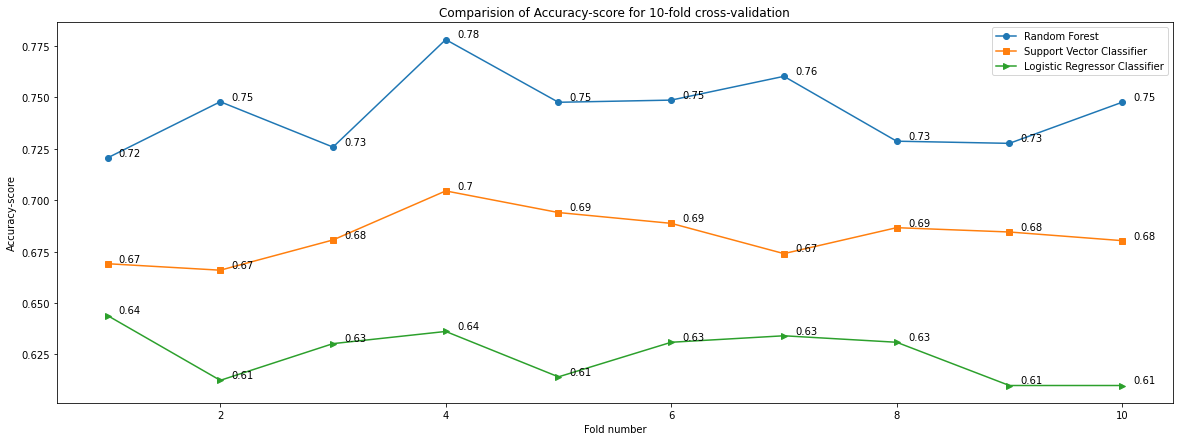

In [82]:
x_axis = [i for i in range(1, 11)]
plt.figure(figsize=(20,7))
plt.plot(x_axis, res_kf_rf, label="Random Forest", marker = 'o')
plt.plot(x_axis, res_kf_svm, label="Support Vector Classifier", marker = 's')
plt.plot(x_axis, res_kf_logi, label="Logistic Regressor Classifier", marker = '>')

for a,b in zip(x_axis, res_kf_rf): 
    plt.text(a+0.1, b+0.001, str(round(b[0], 2)))

for a,b in zip(x_axis, res_kf_svm): 
    plt.text(a+0.1, b+0.001, str(round(b[0], 2)))

for a,b in zip(x_axis, res_kf_logi): 
    plt.text(a+0.1, b+0.001, str(round(b, 2)))

plt.legend()
plt.xlabel("Fold number")
plt.ylabel("Accuracy-score")
plt.title("Comparision of Accuracy-score for 10-fold cross-validation")
plt.show()